- Identify the top 1% outliers: adopt at least three different methods from different families (e.g., density-based, angle-based…) and compare the results. 
- Visualize the outliers in a 2 or 3d scatter plot using at least one dimensionality reduction technique.
- Deal with the outliers in a way you see fit, e.g. by removing them from the dataset or by treating the anomalous variables as missing values and employing replacement techniques. In this second case, you should check that the outliers are not outliers anymore. Justify your choices in every step.

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#LOF
from sklearn.neighbors import LocalOutlierFactor

from collections import Counter
from collections import defaultdict

In [43]:
!pip install scikit-plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc_curve
from sklearn.model_selection import KFold, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df_train = pd.read_csv("/content/Train_ripulito")
df_train = df_train.drop(columns=['Unnamed: 0'], axis = 1)

In [46]:
from sklearn.decomposition import PCA

In [47]:
df_train_copy = df_train

In [48]:
t_train = df_train.drop(columns=['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'], axis = 1)

In [49]:
columns_train = []
columns_train = t_train.columns

In [50]:
#normalizzazione train
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(t_train)

In [51]:
df_trainNORM = pd.DataFrame(x_train_norm, columns = columns_train)

In [52]:
pca = PCA(n_components = 39)
pca.fit(df_trainNORM)
trainNORM_pca = pca.transform(df_trainNORM)

In [53]:
df_trainNORM_pca = pd.DataFrame(trainNORM_pca)

In [54]:
"""df_trainNORM_pca = df_trainNORM_pca.assign(emotion = df_train_copy['emotion'].values)
df_trainNORM_pca= df_trainNORM_pca.assign(vocal_channel = df_train_copy['vocal_channel'].values)
df_trainNORM_pca= df_trainNORM_pca.assign(statement = df_train_copy['statement'].values)
df_trainNORM_pca = df_trainNORM_pca.assign(repetition = df_train_copy['repetition'].values)
df_trainNORM_pca = df_trainNORM_pca.assign(sex = df_train_copy['sex'].values)
df_trainNORM_pca = df_trainNORM_pca.assign(filename = df_train_copy['filename'].values)
df_trainNORM_pca = df_trainNORM_pca.assign(emotional_intensity = df_train_copy['emotional_intensity'].values)"""

"df_trainNORM_pca = df_trainNORM_pca.assign(emotion = df_train_copy['emotion'].values)\ndf_trainNORM_pca= df_trainNORM_pca.assign(vocal_channel = df_train_copy['vocal_channel'].values)\ndf_trainNORM_pca= df_trainNORM_pca.assign(statement = df_train_copy['statement'].values)\ndf_trainNORM_pca = df_trainNORM_pca.assign(repetition = df_train_copy['repetition'].values)\ndf_trainNORM_pca = df_trainNORM_pca.assign(sex = df_train_copy['sex'].values)\ndf_trainNORM_pca = df_trainNORM_pca.assign(filename = df_train_copy['filename'].values)\ndf_trainNORM_pca = df_trainNORM_pca.assign(emotional_intensity = df_train_copy['emotional_intensity'].values)"

In [55]:
"""train_happy = []
for value in df_trainNORM['emotion']:
  if(value == 'happy'):
    train_happy.append(1)
  else:
    train_happy.append(0)"""

"train_happy = []\nfor value in df_trainNORM['emotion']:\n  if(value == 'happy'):\n    train_happy.append(1)\n  else:\n    train_happy.append(0)"

In [56]:
#df_trainNORM = df_trainNORM.assign(happy = train_happy)

Outliers Detection sul TRAIN normalizzato e originale (ovvero solo ripulito con la data preparation)

Boxplot - IQR score

In [57]:
#function that detect outliers based on IQR 
def outlier_detector(var):
    ''' function that calculates Q1,Q3,IQR and return the number of outliers of a given variable'''
    Q1=df_trainNORM_pca[var].quantile(0.25)
    Q3=df_trainNORM_pca[var].quantile(0.75)
    IQR=Q3-Q1
    
    print('{}:'.format(var))
    print('Q1: {}\nQ3: {}\nIQR: {}'.format(Q1,Q3,IQR))
    
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    
    print('lower range: {}\nupper range: {}'.format(lower_whisker,upper_whisker))
    outliers = sum(df_trainNORM_pca[var]<lower_whisker) + sum(df_trainNORM_pca[var]>upper_whisker)
    print('{} has {} potential outliers'.format(var,outliers))
    


    #function that removes outliers
def outlier_remove(variable,u_whisker, l_whisker):
    df_trainNORM_clean = df_trainNORM_clean.drop(index=df_trainNORM_pca[df_trainNORM[variable]< l_whisker].index, inplace=True)
    df_trainNORM_clean = df_trainNORM_clean.drop(index=df_trainNORM_pca[df_trainNORM[variable]> u_whisker].index, inplace=True)
    

In [58]:
df_trainNORM_pca.shape

(1828, 39)

In [59]:
for col in df_trainNORM_pca.iloc[:,:197].columns:
    outlier_detector(var=col)
    print('\n')

0:
Q1: -4.150709510782338
Q3: 4.162699071004184
IQR: 8.313408581786522
lower range: -16.62082238346212
upper range: 16.63281194368397
0 has 2 potential outliers


1:
Q1: -3.861623693332798
Q3: 3.6706577289344535
IQR: 7.532281422267252
lower range: -15.160045826733676
upper range: 14.969079862335331
1 has 0 potential outliers


2:
Q1: -2.4522157106771476
Q3: 2.3685362214858254
IQR: 4.820751932162973
lower range: -9.683343608921607
upper range: 9.599664119730285
2 has 41 potential outliers


3:
Q1: -2.211925791669191
Q3: 1.7099391496688185
IQR: 3.9218649413380096
lower range: -8.094723203676205
upper range: 7.592736561675833
3 has 58 potential outliers


4:
Q1: -1.6204363012585803
Q3: 1.3956109952836422
IQR: 3.0160472965422223
lower range: -6.144507246071914
upper range: 5.919681940096975
4 has 47 potential outliers


5:
Q1: -1.5620171126744298
Q3: 1.305725996777583
IQR: 2.8677431094520127
lower range: -5.863631776852449
upper range: 5.607340660955602
5 has 41 potential outliers


6:
Q1:

In [60]:
def is_outlier(x, k=1.5):
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3 - q1
    outliers = list()
    for v in x:
        if v < q1 - k * iqr or v > q3 + k * iqr:
            outliers.append(True)
        else:
            outliers.append(False)
    return np.array(outliers)

HBOS

In [61]:
!pip install pyod
from pyod.models.hbos import HBOS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184112 sha256=d15cbf9f740ea0a4030874152653c45f500f7f9d6beacf5006b46510b66b3378
  Stored in directory: /root/.cache/pip/wheels/1b/9c/b8/9759d7cc64a1e01bb9872ade80cb7db445ccf506e083325106
Successfully built pyod


In [62]:
clf = HBOS(contamination= 0.01)
clf.fit(df_trainNORM_pca)

HBOS(alpha=0.1, contamination=0.01, n_bins=10, tol=0.5)

In [63]:
clf.decision_scores_

array([97.34854858, 76.17488765, 82.66955414, ..., 76.75571706,
       70.60807193, 73.04619976])

In [64]:
#predict decide solo se è un outlier o no, non è una vera predict
#0 = non outlier 1 = outlier
outliers = clf.predict(df_trainNORM_pca)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1809,   19]))

In [65]:
df_copy_trainNORM_pca = df_trainNORM_pca

In [66]:
# save outlier scores to df
df_trainNORM_pca['outlier_HBOS'] = outliers 
df_trainNORM_pca['outlier_HBOS'] = df_trainNORM_pca['outlier_HBOS'].apply(lambda x: 'inlier' if x==1 else 'outlier')

df_copy_trainNORM_pca['outlier_HBOS'] = outliers 
df_copy_trainNORM_pca['outlier_HBOS'] = df_copy_trainNORM_pca['outlier_HBOS'].apply(lambda x: 'inlier' if x==1 else 'outlier')

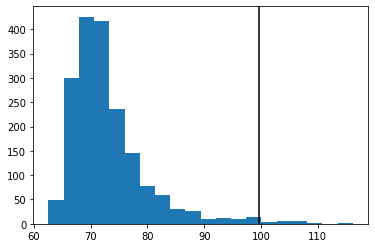

In [67]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()
#punti a destra della linea sono outliers
#distribution of outlier score

In [68]:
df_trainNORM_pca = df_trainNORM_pca.drop(columns = ['outlier_HBOS'])
clf.decision_function(df_trainNORM_pca)

array([97.34854858, 76.17488765, 82.66955414, ..., 76.75571706,
       70.60807193, 73.04619976])

Approccio Depth - Based

Elliptic Envelope

In [69]:
from sklearn.covariance import EllipticEnvelope

In [70]:
ellenv = EllipticEnvelope(contamination= 0.01,random_state=42)
ellenv.fit(df_trainNORM_pca)

EllipticEnvelope(contamination=0.01, random_state=42)

In [71]:
outliers = ellenv.predict(df_trainNORM_pca)

In [72]:
np.unique(outliers, return_counts=True)
#1 inliers #-1 outliers

(array([-1,  1]), array([  19, 1809]))

In [73]:
# save outlier scores to df
df_trainNORM_pca['outlier_ELLIPTIC'] = outliers 
df_trainNORM_pca['outlier_ELLIPTIC'] = df_trainNORM_pca['outlier_ELLIPTIC'].apply(lambda x: 'inlier' if x==-1 else 'outlier')

df_copy_trainNORM_pca['outlier_ELLIPTIC'] = outliers 
df_copy_trainNORM_pca['outlier_ELLIPTIC'] = df_copy_trainNORM_pca['outlier_ELLIPTIC'].apply(lambda x: 'inlier' if x==-1 else 'outlier')

In [74]:
df_trainNORM_pca = df_trainNORM_pca.drop(columns = ['outlier_ELLIPTIC'])

PCA per dimensionality reduction e visualizzazione outlier in 2 o 3d scatter plot

In [75]:
pca = PCA(39,random_state=42) 
pca.fit(df_trainNORM_pca)
pca_proj = pca.transform(df_trainNORM_pca)
df_pca = pd.DataFrame(pca_proj[:,:3], columns= ['pca1', 'pca2', 'pca3'])
df_pca

,pca1,pca2,pca3
0,-12.417521,-2.739302,-2.310127
1,-10.507895,0.321534,-0.706881
2,-11.017278,-0.193467,-1.888725
3,-10.655231,0.024790,1.028421
4,-9.913091,-1.057301,-4.302262
...,...,...,...
1823,-6.594036,-4.516900,-3.513601
1824,-2.534264,-8.614069,1.665215
1825,-4.984851,-7.011574,-1.273784
1826,-1.780053,-7.892575,-1.076703


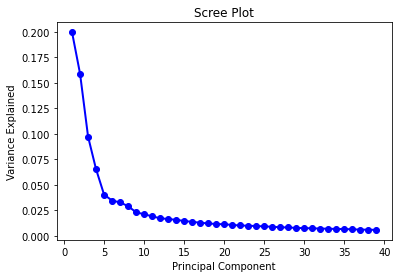

<Figure size 360x288 with 0 Axes>

In [76]:
import matplotlib.pyplot as plt
import numpy as np
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.figure(figsize=(5,4))
plt.show()

Text(0.5, 1.0, 'Data distribution in 2D')

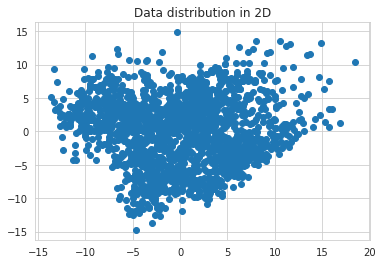

In [77]:
sns.set_style(style="whitegrid")
sns.set_color_codes()
plt.figure(figsize=(6,4))
plt.scatter(df_pca['pca1'],df_pca['pca2'])
plt.title('Data distribution in 2D')

Approccio Distance-Based 

KNN

In [78]:
from pyod.models.knn import KNN

In [79]:
clf = KNN(n_neighbors=50, contamination= 0.01)
clf.fit(df_trainNORM_pca)

KNN(algorithm='auto', contamination=0.01, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=50, p=2,
  radius=1.0)

In [80]:
clf.decision_scores_

array([23.61246597,  9.92716124, 12.23831822, ..., 12.71003777,
       10.3944138 , 12.09414103])

In [81]:
anomlay_score = clf.decision_function(df_trainNORM_pca)

In [82]:
outliers = clf.predict(df_trainNORM_pca)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1810,   18]))

In [83]:
df_trainNORM_pca['outlier_KNN'] = outliers 
df_trainNORM_pca['outlier_KNN'] = df_trainNORM_pca['outlier_KNN'].apply(lambda x: 'inlier' if x==0 else 'outlier')

df_copy_trainNORM_pca['outlier_KNN'] = outliers
df_copy_trainNORM_pca['outlier_KNN'] = df_copy_trainNORM_pca['outlier_KNN'].apply(lambda x: 'inlier' if x==0 else 'outlier')

<Axes: xlabel='pca1', ylabel='pca2'>

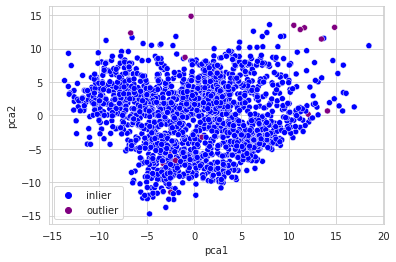

In [84]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='pca1', y='pca2', data=df_pca,  hue=df_trainNORM_pca['outlier_KNN'].values, palette={'inlier':'blue', 'outlier':'purple'})

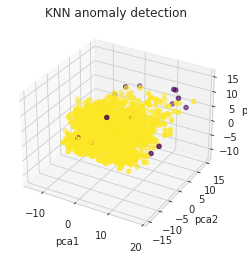

In [85]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca['pca1']
y = df_pca['pca2']
z = df_pca['pca3']
c = df_trainNORM_pca['outlier_KNN'].apply(lambda x: -1 if x == 'outlier' else 1)

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='viridis')
ax.set_title('KNN anomaly detection')
plt.show()

In [86]:
df_trainNORM_pca['outlier_KNN'].value_counts()

inlier     1810
outlier      18
Name: outlier_KNN, dtype: int64

Density Based Approach 

DBSCAN

In [87]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(eps= 5, metric='euclidean', min_samples=15, n_jobs=-1)

df_trainNORM_pca = df_trainNORM_pca.drop(columns = ['outlier_KNN'])
#clusters= outlier_detection.fit_predict(pca_proj)
clusters= outlier_detection.fit_predict(df_trainNORM_pca)

In [88]:
clusters

array([-1, -1, -1, ..., -1, -1, -1])

In [89]:
# add column with outliers label
df_trainNORM_pca['outlier_DBSCAN'] = clusters
df_trainNORM_pca['outlier_DBSCAN'] = df_trainNORM_pca['outlier_DBSCAN'].apply(lambda x: 'outlier' if x==-1 else 'inlier')

df_copy_trainNORM_pca['outlier_DBSCAN'] = clusters
df_copy_trainNORM_pca['outlier_DBSCAN'] = df_copy_trainNORM_pca['outlier_DBSCAN'].apply(lambda x: 'outlier' if x==-1 else 'inlier')

<ipython-input-90-c44808c038d2>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap= cm.get_cmap('Set1')


Text(0.5, 1.0, 'Anomaly Score - DBSCAN')

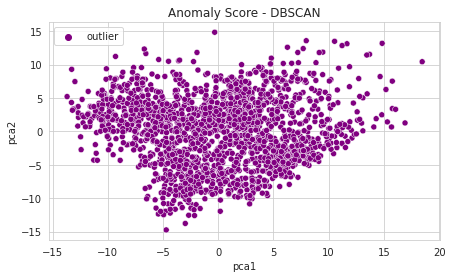

In [90]:
from matplotlib import cm
sns.set_style(style="whitegrid")
sns.set_color_codes()

plt.figure(figsize=(7,4))

cmap= cm.get_cmap('Set1')
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=df_trainNORM_pca['outlier_DBSCAN'].values, palette={'inlier':'blue', 'outlier':'purple'})
plt.title('Anomaly Score - DBSCAN')

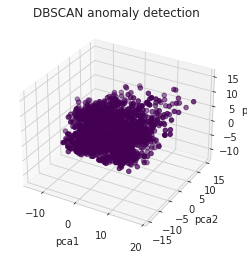

In [91]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca['pca1']
y = df_pca['pca2']
z = df_pca['pca3']
c = df_trainNORM_pca['outlier_DBSCAN'].apply(lambda x: -1 if x == 'outlier' else 1)

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='viridis')
ax.set_title('DBSCAN anomaly detection')
plt.show()

In [92]:
df_trainNORM_pca[df_trainNORM_pca['outlier_DBSCAN'] =='outlier']['outlier_DBSCAN'].value_counts()

outlier    1828
Name: outlier_DBSCAN, dtype: int64

LOF

In [93]:
from sklearn.neighbors import LocalOutlierFactor

In [94]:
clf = LocalOutlierFactor(n_neighbors=150, contamination=0.01)
df_trainNORM_pca = df_trainNORM_pca.drop(columns = ['outlier_DBSCAN'], axis = 1)
outliers = clf.fit_predict(df_trainNORM_pca)

In [95]:
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [96]:
# adding scores to df 
df_trainNORM_pca['outlier_LOF'] = outliers
df_trainNORM_pca['outlier_LOF'] = df_trainNORM_pca['outlier_LOF'].apply(lambda x: 'inlier' if x==1 else 'outlier')

df_copy_trainNORM_pca['outlier_LOF'] = outliers
df_copy_trainNORM_pca['outlier_LOF'] = df_copy_trainNORM_pca['outlier_LOF'].apply(lambda x: 'inlier' if x==1 else 'outlier')

In [97]:
df_trainNORM_pca[['outlier_LOF']].value_counts()

outlier_LOF
inlier         1809
outlier          19
dtype: int64

In [98]:
#In this implementation of LOF outliers have a score close to -1, whereas inlier have a score close to +1.
clf.negative_outlier_factor_

array([-2.16546566, -1.08589241, -1.23508455, ..., -1.21874428,
       -1.07100768, -1.18529064])

In [99]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  19, 1809]))

In [100]:
#Inspecting outliers score
# maximum outlier score
np.max(clf.negative_outlier_factor_[np.where(outliers==-1)])

-2.384038791586214

In [101]:
# minimum outlier score
np.min(clf.negative_outlier_factor_[np.where(outliers==-1)])

-4.394162286272958

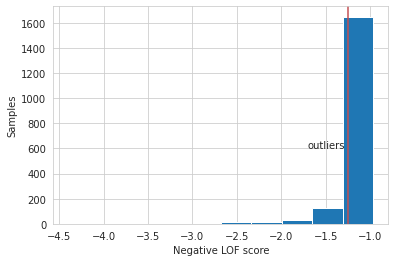

In [102]:
plt.figure(figsize=(6,4))
plt.hist(clf.negative_outlier_factor_, bins=10)
plt.axvline(-1.25, c='r')
plt.text(-1.7, 600, 'outliers')
plt.ylabel('Samples')
plt.xlabel('Negative LOF score')
plt.show()

<ipython-input-103-6ea26380d224>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap= cm.get_cmap('Set1')


Text(0.5, 1.0, 'Anomaly Score - LOF')

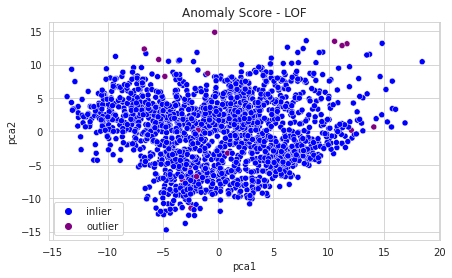

In [103]:
sns.set_style(style="whitegrid")
sns.set_color_codes()

plt.figure(figsize=(7,4))

cmap= cm.get_cmap('Set1')
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=df_trainNORM_pca['outlier_LOF'].values, palette={'inlier':'blue', 'outlier':'purple'},c='k')
plt.title('Anomaly Score - LOF')

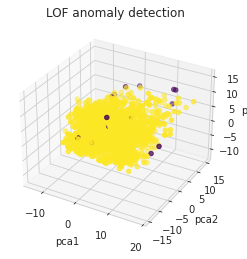

In [104]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca['pca1']
y = df_pca['pca2']
z = df_pca['pca3']
c = df_trainNORM_pca['outlier_LOF'].apply(lambda x: -1 if x == 'outlier' else 1)

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='viridis')
ax.set_title('LOF anomaly detection')
plt.show()

Approcci High Dimensional

ABOD

In [105]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
from pyod.models.abod import ABOD

In [107]:
clf = ABOD(n_neighbors=50, contamination= 0.01)
df_trainNORM_pca= df_trainNORM_pca.drop(columns=['outlier_LOF'], axis = 1)
clf.fit(df_trainNORM_pca)

ABOD(contamination=0.01, method='fast', n_neighbors=50)

In [108]:
clf.decision_scores_

array([-4.97113979e-08, -9.77447874e-06, -7.33557438e-06, ...,
       -4.97847575e-06, -9.58814298e-06, -3.09341911e-06])

In [109]:
outliers = clf.predict(df_trainNORM_pca)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1810,   18]))

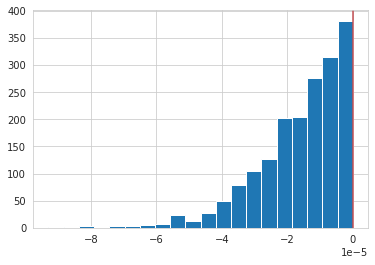

In [110]:
plt.figure(figsize=(6,4))
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='r')
plt.show()

In [111]:
# save outlier scores to df
df_trainNORM_pca['outlier_ABOD'] = outliers 
df_trainNORM_pca['outlier_ABOD'] = df_trainNORM_pca['outlier_ABOD'].apply(lambda x: 'inlier' if x==0 else 'outlier')

df_copy_trainNORM_pca['outlier_ABOD'] = outliers 
df_copy_trainNORM_pca['outlier_ABOD'] = df_copy_trainNORM_pca['outlier_ABOD'].apply(lambda x: 'inlier' if x==0 else 'outlier')

<Axes: xlabel='pca1', ylabel='pca2'>

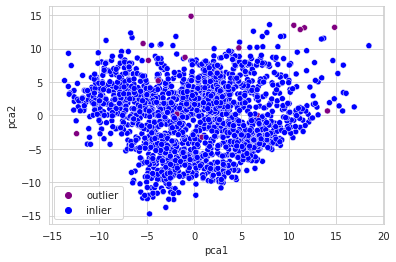

In [112]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=df_trainNORM_pca['outlier_ABOD'].values, palette={'inlier':'blue', 'outlier':'purple'}, c='k')

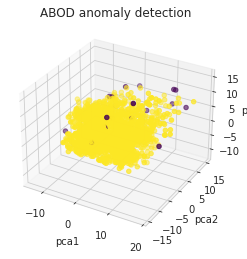

In [113]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca['pca1']
y = df_pca['pca2']
z = df_pca['pca3']
c = df_trainNORM_pca['outlier_ABOD'].apply(lambda x: -1 if x == 'outlier' else 1)

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='viridis')
ax.set_title('ABOD anomaly detection')
plt.show()

In [114]:
df_trainNORM_pca['outlier_ABOD'].value_counts()

inlier     1810
outlier      18
Name: outlier_ABOD, dtype: int64

  Approcci Model Based

Isolation Forest

We tested 2 libraries:

Sklearn IsolationForest
eif library
The eif library allow to build an Isolation forest and an Extended Isolation forest.
We will confront the results generated by the Isolation forest developed by sklearn and the one developed by eif.

In [115]:
!pip install eif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eif: filename=eif-2.0.2-cp39-cp39-linux_x86_64.whl size=321784 sha256=f51550859c782e9af9af92ece95c80076388193de90bfe8bec56535cb06ef951
  Stored in directory: /root/.cache/pip/wheels/85/b3/d6/eeabb0dfcccba30be42d21d1433b4835ca2d1a373381456112
Successfully built eif


In [116]:
import eif as iso
from sklearn.ensemble import IsolationForest

sns.set_style(style="whitegrid")
sns.set_color_codes()

F0 è la foresta di isolamento standard, che corrisponde al livello di estensione 0 nel contesto di EIF. F1 è la foresta di isolamento estesa con estensione 1, che nel caso di dati 2_D (come qui), è il caso completamente esteso.
F0_sk è la foresta di isolamento sviluppata in sklearn.

In [117]:
# transform data in an np.ndarray 
X_pca = np.array(pca_proj) 
df_trainNORM_pca = df_trainNORM_pca.drop(columns =['outlier_ABOD'], axis = 1)
X_fd= np.array(df_trainNORM_pca)  #no dim reduction

Train Forest

Di seguito utilizziamo gli stessi valori per entrambe le foreste di isolamento ( sklern e eif) per confrontarle.

ntree = numero di alberi da utilizzare per l'adattamento della foresta//
sample_size = numero di righe da sottocampionare nella creazione di ciascun albero. Questo deve essere inferiore al numero di osservazioni nel set di dati

In [118]:
#----------------------------------- eif -----------------------------------------------------------#
# PCA REDUCTION FORESTS
F0  = iso.iForest(X_pca, ntrees=600, sample_size=256, ExtensionLevel=0) # ExtensionLevel=0 -> regular Isolation Forest
F1  = iso.iForest(X_pca, ntrees=600, sample_size=256, ExtensionLevel=1) # ExtensionLevel=1 -> Extended Isolation Forest

# FULL DIMENSIONALITY FORESTS
F0_fd =iso.iForest(X_fd, ntrees=600, sample_size=256, ExtensionLevel=0)
F1_fd =iso.iForest(X_fd, ntrees=600, sample_size=256, ExtensionLevel=1)

#----------------------------------- sklearn -----------------------------------------------------------#
F0_sk = IsolationForest(random_state=42, n_estimators=600, contamination=0.01).fit(X_fd) #isolation-forest sklearn version

In [119]:
xxx = np.array([[0,0.]])
SL0 = F0.compute_paths_single_tree(xxx, 0)

In [120]:
SL0[0]

13.040438003487065

In [121]:
F0.limit

8

Score data

In [122]:
# score isolation forest - sklearn
outliers_sk = F0_sk.predict(X_fd)

In [136]:
# Score the training data itself to see the distribution of the anomaly scores each point receives. 
# full dimensionality
S0_fd = F0_fd.compute_paths(X_in=X_fd)
S1_fd = F1_fd.compute_paths(X_in=X_fd)

eif - Isolation forests and Extended isolation forests

In [137]:
# Full dimensioality
df_trainNORM_pca['outlier_IF'] = S0_fd
df_trainNORM_pca['outlier_IF'] = df_trainNORM_pca['outlier_IF'].apply(lambda x: 'inlier' if x<=0.6 else 'outlier')
df_trainNORM_pca['outlier_EIF'] = S1_fd
df_trainNORM_pca['outlier_EIF'] = df_trainNORM_pca['outlier_EIF'].apply(lambda x: 'inlier' if x<=0.6 else 'outlier')

df_copy_trainNORM_pca['outlier_IF'] = S0_fd
df_copy_trainNORM_pca['outlier_IF'] = df_copy_trainNORM_pca['outlier_IF'].apply(lambda x: 'inlier' if x<=0.6 else 'outlier')
df_copy_trainNORM_pca['outlier_EIF'] = S1_fd
df_copy_trainNORM_pca['outlier_EIF'] = df_copy_trainNORM_pca['outlier_EIF'].apply(lambda x: 'inlier' if x<=0.6 else 'outlier')

sklearn - Isolation forests

In [138]:
# IsolationForest Sklearn
df_trainNORM_pca['outlier_IF_sklearn'] = outliers_sk
df_trainNORM_pca['outlier_IF_sklearn'] = df_trainNORM_pca['outlier_IF_sklearn'].apply(lambda x: 'inlier' if x==1 else 'outlier')

df_copy_trainNORM_pca['outlier_IF_sklearn'] = outliers_sk
df_copy_trainNORM_pca['outlier_IF_sklearn'] = df_copy_trainNORM_pca['outlier_IF_sklearn'].apply(lambda x: 'inlier' if x==1 else 'outlier')

check results

In [139]:
# sklearn IF
print('**** sklearn library *****')
df_trainNORM_pca['outlier_IF_sklearn'].value_counts()

**** sklearn library *****


inlier     1809
outlier      19
Name: outlier_IF_sklearn, dtype: int64

In [140]:
# IF
print('**** eif library *****')
df_trainNORM_pca['outlier_IF'].value_counts()
#We can see that sklearn is able to detect more anomalies than the model developed by eif !!!!!

**** eif library *****


inlier     1809
outlier      19
Name: outlier_IF, dtype: int64

In [141]:
# EIF
print('**** eif library *****')
df_trainNORM_pca['outlier_EIF'].value_counts()

**** eif library *****


inlier     1807
outlier      21
Name: outlier_EIF, dtype: int64

Plot anomaly scores

Text(0.5, 1.0, 'eif - Extended Isolation Tree (full-dim plotted in 2D)')

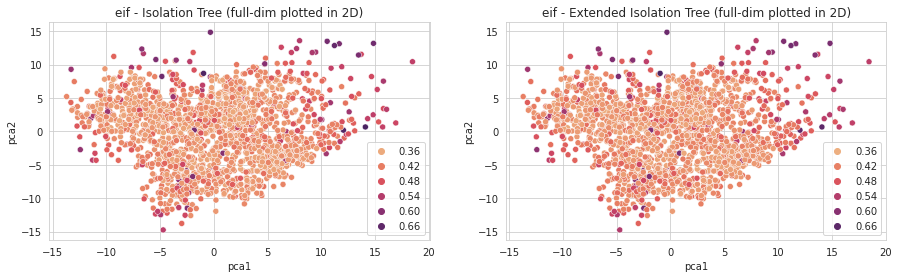

In [142]:
# ------- eif: Isolation Forest and Extended Isolation Forest - full dimensionality ------------------------------#
f = plt.figure(figsize=(15,4))

ax1 = f.add_subplot(121)
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=S0_fd,palette='flare')
plt.title('eif - Isolation Tree (full-dim plotted in 2D)')


ax2 = f.add_subplot(122)
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=S1_fd,palette='flare')
plt.title('eif - Extended Isolation Tree (full-dim plotted in 2D)')

Text(0.5, 1.0, 'Sklearn - Isolation Tree (full-dim plotted in 2D)')

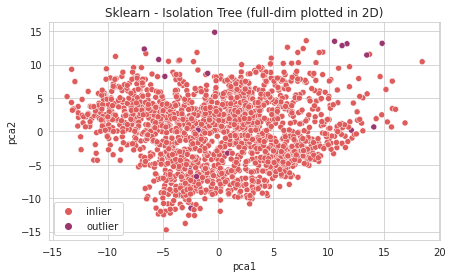

In [143]:
# ---------------- sklearn: Isolation Forest - full dimensionality -------------------------------------#

plt.figure(figsize=(7,4))

sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=df_trainNORM_pca['outlier_IF_sklearn'].values ,palette='flare')
plt.title('Sklearn - Isolation Tree (full-dim plotted in 2D)')

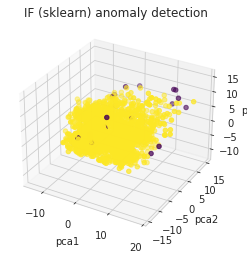

In [144]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca['pca1']
y = df_pca['pca2']
z = df_pca['pca3']
c = df_trainNORM_pca['outlier_IF_sklearn'].apply(lambda x: -1 if x == 'outlier' else 1)

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='viridis')
ax.set_title('IF (sklearn) anomaly detection')
plt.show()

Anomaly Score Distribution.
Anomaly are scores with a value betwee 0 and 1.
The higher the score the more likely the observation is an outlier.

<ipython-input-145-7f93f88c4e19>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(S0_fd, kde=True, color="b")
<ipython-input-145-7f93f88c4e19>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(S1_fd, kde=True, color="b")


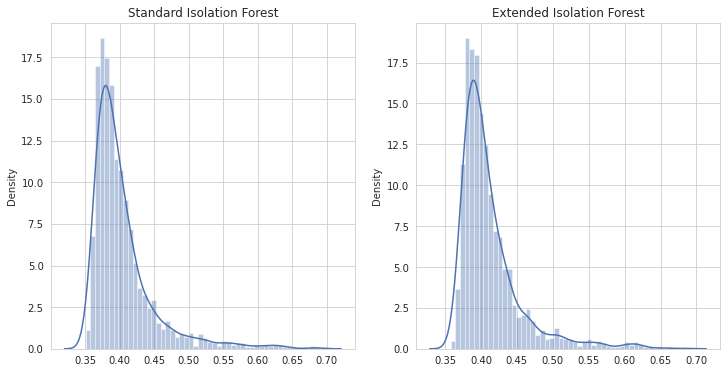

In [145]:
# Isolation forest full-dim - eif
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(S0_fd, kde=True, color="b")
plt.title('Standard Isolation Forest')

# Extended Isolation forest full-dim - eif
plt.subplot(1,2,2)
sns.distplot(S1_fd, kde=True, color="b")
plt.title('Extended Isolation Forest')
plt.show()

Ensamble Based Approach

LODA

In [146]:
from pyod.models.loda import LODA

In [147]:
clf = LODA(contamination = 0.01)
df_trainNORM_pca = df_trainNORM_pca.drop(columns = ['outlier_EIF', 'outlier_IF', 'outlier_IF_sklearn', 'outlier_IF-PCA', 'outlier_EIF-PCA'])
clf.fit(df_trainNORM_pca)

LODA(contamination=0.01, n_bins=10, n_random_cuts=100)

In [148]:
outliers = clf.predict(df_trainNORM_pca)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1809,   19]))

In [149]:
clf.decision_scores_

array([0.03098196, 0.02189931, 0.02292368, ..., 0.02100528, 0.01879578,
       0.02048585])

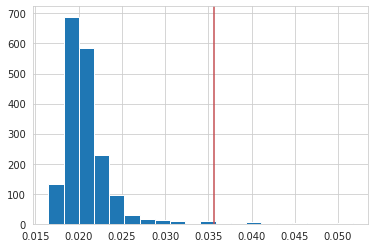

In [150]:
plt.figure(figsize=(6,4))
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='r')
plt.show()


In [151]:
# save outlier scores to df
df_trainNORM_pca['outlier_LODA'] = outliers 
df_trainNORM_pca['outlier_LODA'] = df_trainNORM_pca['outlier_LODA'].apply(lambda x: 'inlier' if x==0 else 'outlier')

df_copy_trainNORM_pca['outlier_LODA'] = outliers 
df_copy_trainNORM_pca['outlier_LODA'] = df_copy_trainNORM_pca['outlier_LODA'].apply(lambda x: 'inlier' if x==0 else 'outlier')


<Axes: xlabel='pca1', ylabel='pca2'>

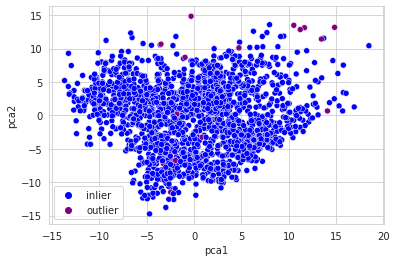

In [152]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=df_trainNORM_pca['outlier_LODA'].values, palette={'inlier':'blue', 'outlier':'purple'}, c='k')


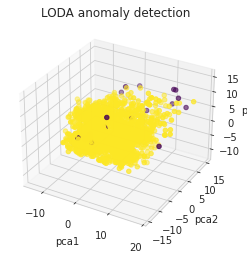

In [153]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca['pca1']
y = df_pca['pca2']
z = df_pca['pca3']
c = df_trainNORM_pca['outlier_LODA'].apply(lambda x: -1 if x == 'outlier' else 1)

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='viridis')
ax.set_title('LODA anomaly detection')
plt.show()


In [154]:
df_trainNORM_pca['outlier_LODA'].value_counts()

inlier     1809
outlier      19
Name: outlier_LODA, dtype: int64

Approcci statistici

Likelihood Approach

In [155]:
import numpy as np
from scipy import stats

In [156]:
df_trainNORM_pca = df_trainNORM_pca.drop(columns= ['outlier_LODA'])
data = np.array(df_trainNORM)

In [157]:
def norm_dist(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.e**(-((x-mu)**2)/(2*sigma**2))
              
def unif_dist(x, n):
    return 1/n

In [158]:
M = np.copy(data)
A = list()
muM = np.mean(M)
sigmaM = np.std(M)

In [159]:
norm_dist(15, muM, sigmaM)

5.53070954984445e-50

In [160]:
M = np.copy(data)
A = []
lambda_par = 0.3

muM = np.mean(M)
sigmaM = np.std(M)
sizeA = len(A)

sumM = np.sum([norm_dist(x, muM, sigmaM) for x in M])

sumA = np.sum([unif_dist(x, sizeA) for x in A])

ll = (len(M) * np.log(1-lambda_par) + sumM + len(A) * np.log(lambda_par) + sumA)

In [161]:
M = np.copy(data)
A = []
c = 0.2
for i, x in enumerate(data):
    A.append(x)
    M = np.array([xo for j, xo in enumerate(data) if i!=j])
    muM = np.mean(M)
    sigmaM = np.std(M)
    sizeA = len(A)
    sumM = np.sum([norm_dist(x, muM, sigmaM) for x in M])
    sumA = np.sum([unif_dist(x, sizeA) for x in A])
    ll_xi = (len(M) * np.log(1-lambda_par) + sumM + len(A) * np.log(lambda_par) + sumA)
    delta_ll = abs(ll - ll_xi)
    print(i, delta_ll, 'outlier' if delta_ll > c else 'inlier')
    M = np.copy(data)
    A = list()

0 12.764206038380507 outlier
1 50.65710917991237 outlier
2 44.154228643878014 outlier
3 52.4752162060031 outlier
4 52.13879602176894 outlier
5 45.21211534946633 outlier
6 53.477023478844785 outlier
7 47.99823892459972 outlier
8 3.291632086096797 outlier
9 55.04867814174213 outlier
10 62.08832257379254 outlier
11 55.864205524063436 outlier
12 63.64192552705936 outlier
13 60.53262345735857 outlier
14 64.95910162579094 outlier
15 64.8757783484034 outlier
16 78.23835353726463 outlier
17 75.12880731532641 outlier
18 81.66336256387876 outlier
19 72.18548923677008 outlier
20 60.80572282183857 outlier
21 57.78940414468525 outlier
22 39.47497569221014 outlier
23 46.05068085840321 outlier
24 58.97804077215551 outlier
25 54.33048548529041 outlier
26 61.38200850744033 outlier
27 59.16728775537922 outlier
28 72.84269698779099 outlier
29 76.99973052779387 outlier
30 73.68628869211534 outlier
31 78.50644508845289 outlier
32 46.927746698478586 outlier
33 12.919129991307273 outlier
34 55.27366327175696

prova che è il dataset sia stato modificato correttamente

In [162]:
df_copy_trainNORM_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,outlier_KNN,outlier_DBSCAN,outlier_LOF,outlier_ABOD,outlier_IF-PCA,outlier_EIF-PCA,outlier_IF,outlier_EIF,outlier_IF_sklearn,outlier_LODA
0,-12.417521,-2.739302,-2.310127,-1.574581,2.666012,-2.124536,5.407759,-3.939435,1.903718,1.889191,...,inlier,outlier,inlier,outlier,inlier,inlier,inlier,inlier,inlier,inlier
1,-10.507895,0.321534,-0.706881,-3.346734,-0.048146,-1.432286,3.484029,-2.587124,0.264374,3.592150,...,inlier,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
2,-11.017278,-0.193467,-1.888725,-2.672821,1.164814,-2.216073,3.465421,-3.167040,1.770989,2.534638,...,inlier,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
3,-10.655231,0.024790,1.028421,-1.541576,-1.075290,-0.553649,5.475830,-2.108617,-0.317421,2.408580,...,inlier,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
4,-9.913091,-1.057301,-4.302262,-1.952505,1.597192,-1.924844,4.847863,-0.797815,1.607113,1.410337,...,inlier,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier


Removing Outliers (only from train)

Sulla base dei punteggi forniti da ciascun metodo di rilevamento dei valori anomali, effettueremo una votazione a maggioranza per determinare se un punto x è un valore anomalo o un valore inlier.

In [163]:
# majority voting
mostCommonVote=[]
for row in df_copy_trainNORM_pca[['outlier_DBSCAN','outlier_LOF','outlier_ABOD','outlier_IF_sklearn','outlier_IF', 'outlier_EIF','outlier_LODA','outlier_KNN', 'outlier_HBOS', 'outlier_ELLIPTIC']].values:
    votes, values = np.unique(row, return_counts=True)
    if np.all(values<=1):
            mostCommonVote.append( row[0] )
    else:
        mostCommonVote.append( votes[np.argmax(values)] )

df_copy_trainNORM_pca['Winner'] = mostCommonVote

In [164]:
df_copy_trainNORM_pca[['Winner']].value_counts()

Winner 
inlier     1807
outlier      21
dtype: int64

Plot in 3D the average outlier score

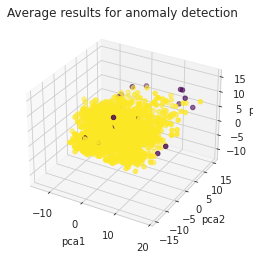

In [165]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca['pca1']
y = df_pca['pca2']
z = df_pca['pca3']
c = df_copy_trainNORM_pca['Winner'].apply(lambda x: -1 if x == 'outlier' else 1)

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='viridis')
ax.set_title('Average results for anomaly detection')
plt.show()

rimozione outliers

In [166]:
df_without_outliers = df_copy_trainNORM_pca.drop(index=df_copy_trainNORM_pca[df_copy_trainNORM_pca['Winner']=='outlier'].index, axis=0)

In [167]:
df_without_outliers.shape

(1807, 52)